<a href="https://colab.research.google.com/github/2303A51248/AIML--2025_B18/blob/main/aiml_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score


In [ ]:
# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels (3 classes)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

# Predict using the Random Forest model
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 1.0000


In [ ]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict using the Decision Tree model
dt_predictions = dt_model.predict(X_test)

# Calculate accuracy for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")


Decision Tree Accuracy: 1.0000


Top Feature Importances:
             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


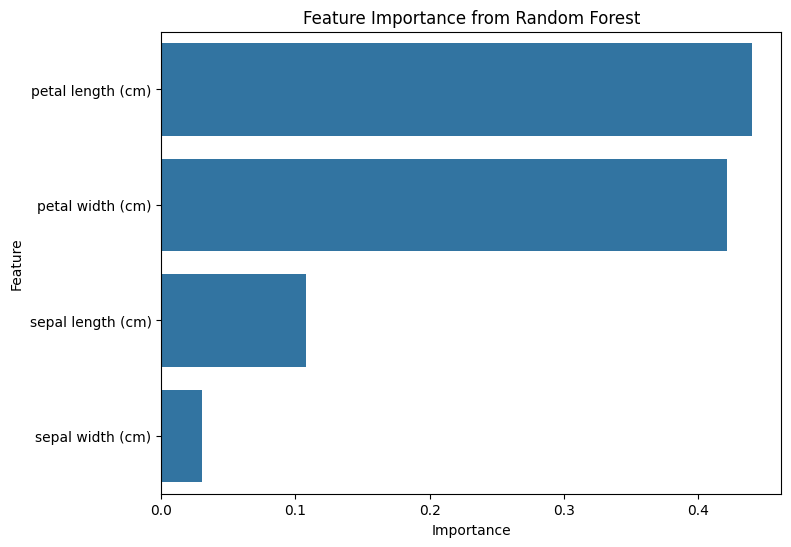

In [ ]:
# Get feature importances from Random Forest
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance visualization
features = data.feature_names
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Feature Importances:")
print(importance_df)

# Visualize feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()


OOB Score (Accuracy): 0.9167


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too fe

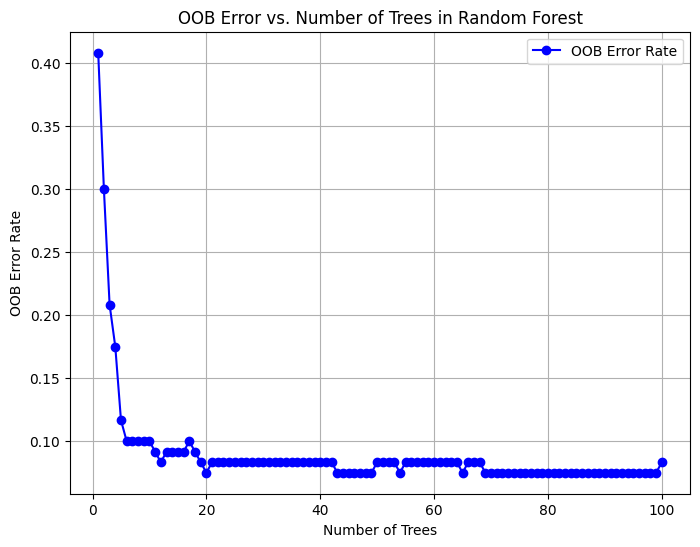

In [ ]:
# OOB score is calculated when oob_score=True
print(f"OOB Score (Accuracy): {rf_model.oob_score_:.4f}")

# Visualize OOB error vs. number of trees in the forest
n_trees = range(1, 101)
oob_errors = []

for n in n_trees:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42, oob_score=True)
    rf_model.fit(X_train, y_train)
    oob_errors.append(1 - rf_model.oob_score_)

plt.figure(figsize=(8, 6))
plt.plot(n_trees, oob_errors, marker='o', color='b', label="OOB Error Rate")
plt.title("OOB Error vs. Number of Trees in Random Forest")
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error Rate")
plt.grid(True)
plt.legend()
plt.show()


Confusion Matrix for Random Forest:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


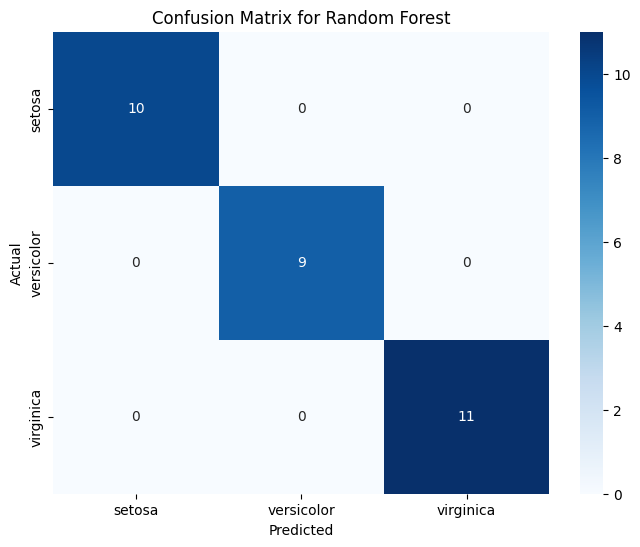

F1-Score for Random Forest: 1.0000


In [ ]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix for Random Forest:")
print(cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate F1-score for Random Forest
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')
print(f"F1-Score for Random Forest: {rf_f1_score:.4f}")
